<a href="https://colab.research.google.com/github/skbhere/Simple-forecast-predicion-for-Covid-19-/blob/master/02_Mdu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import numpy as np
import pandas as pd

In [141]:
df0 = pd.read_json("https://api.covid19india.org/districts_daily.json")

In [142]:
df =  pd.DataFrame(df0,index=['Tamil Nadu'])

In [143]:
MDU = df['districtsDaily']['Tamil Nadu']['Madurai']

In [144]:
data =pd.DataFrame(MDU)
data

,active,confirmed,deceased,recovered,date,notes
0,18,46,0,28,2020-04-21,NaN
1,22,50,0,28,2020-04-22,
2,24,52,0,28,2020-04-23,
3,28,56,0,28,2020-04-24,
4,32,60,0,28,2020-04-25,
...,...,...,...,...,...,...
70,1708,2557,32,817,2020-06-30,
71,1941,2858,39,878,2020-07-01,
72,2203,3133,43,887,2020-07-02,
73,2405,3423,51,967,2020-07-03,


In [145]:
daily = [0] * len(data)

In [146]:
dat = data['date']
con =  data['confirmed']
dec = data['deceased']
rec = data['recovered']


i=1
while i<len(con):
  daily[i] =con[i]-con[i-1]
  i += 1   

# i = 1
# while i < len(TConfirmed):
#     DConfirmed[i]=TConfirmed[i]-TConfirmed[i-1]
#     i += 1
n = len(data)
day = list(range(1, n+1))

dict1 = { 'Day' :day,
'Date' : dat,
'Total Confirmed' :con,
'Daily Confirmed' : daily,
'Total Deceased' : dec,
'Total Recovered' : rec,
}

# nn = len(data)
# day1 = list(range(1, nn+1))
   


dict1
DF= pd.DataFrame(dict1) 
DF.tail(15)
# DF=DF.head(len(DF))
# DF=DF.reindex(index=DF.index[::-1])

# Dailyf = pd.DataFrame(dict2) 
# Dailyf=Dailyf.reindex(index=Dailyf.index[::-1])
# Dailyf["Day"] = day1
# df=Dailyf
# #data['2020-06-13']['confirmed']

,Day,Date,Total Confirmed,Daily Confirmed,Total Deceased,Total Recovered
60,61,2020-06-20,636,86,8,367
61,62,2020-06-21,705,69,8,381
62,63,2020-06-22,849,144,8,389
63,64,2020-06-23,988,139,9,405
64,65,2020-06-24,1073,85,9,423
65,66,2020-06-25,1279,206,11,448
66,67,2020-06-26,1477,198,13,520
67,68,2020-06-27,1703,226,20,548
68,69,2020-06-28,1995,292,25,591
69,70,2020-06-29,2302,307,29,609


In [147]:
xlen=len(DF)
sp=round(xlen*0.9)
DF['Date'] = pd.to_datetime(DF['Date'])


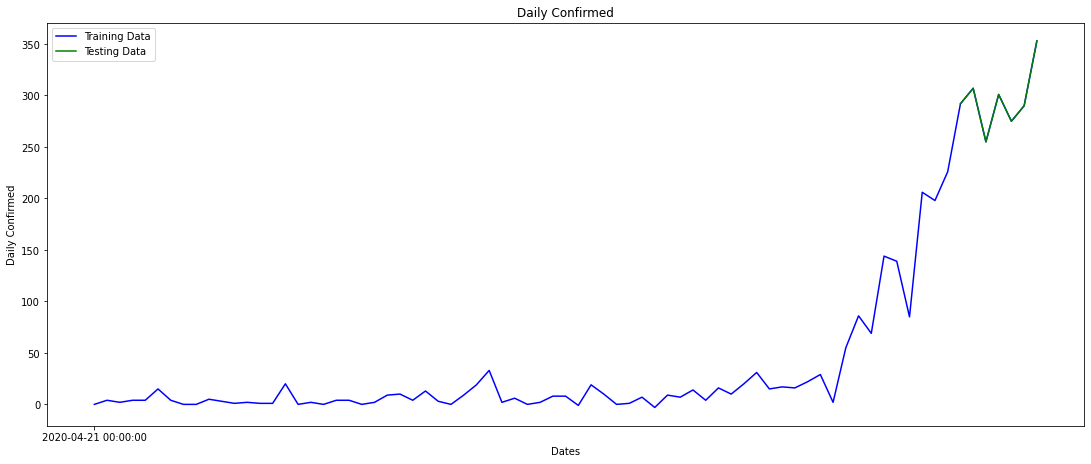

In [148]:
import matplotlib.pyplot as plt
train_data, test_data = DF[0:sp], DF[sp:]
fig= plt.figure(figsize=(18,7))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
#plt.figure(figsize=(12,7))
plt.title('Daily Confirmed')
plt.xlabel('Dates')
plt.ylabel('Daily Confirmed')
plt.plot(DF['Daily Confirmed'], 'blue', label='Training Data')
plt.plot(test_data['Daily Confirmed'], 'green', label='Testing Data')
plt.xticks(np.arange(0,sp,xlen), DF['Date'][0:sp:xlen])
plt.legend()

In [149]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) +       np.abs(y_true))))

In [150]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
train_ar = train_data['Daily Confirmed'].values
test_ar = test_data['Daily Confirmed'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    my_order = (1, 1, 1)
    my_seasonal_order = (1, 1, 1, 12)
    model = SARIMAX(history, order=my_order, seasonal_order=my_seasonal_order)
    #model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)



<class 'list'>
Testing Mean Squared Error: 1642.606
Symmetric mean absolute percentage error: 11.719


In [151]:
f=[]
def forecast(x) :
  f = model_fit.forecast(steps=x)
  f = np.round(f)
  return f

In [152]:
forecast(5)

array([324., 327., 298., 360., 357.])

In [153]:
df=DF

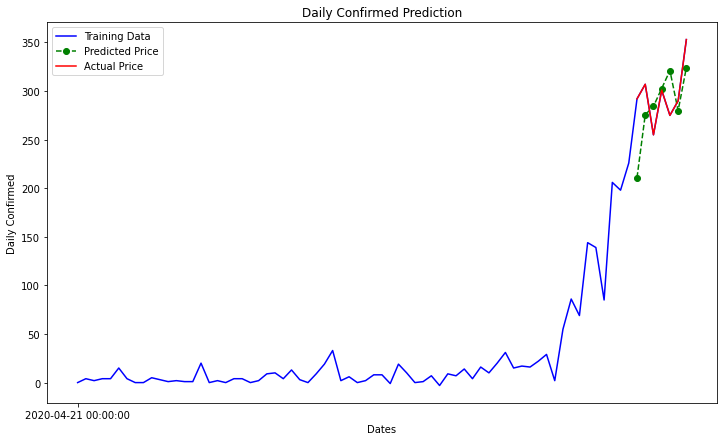

In [154]:
plt.figure(figsize=(12,7))
plt.plot(df['Daily Confirmed'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Daily Confirmed'], color='red', label='Actual Price')
plt.title('Daily Confirmed Prediction')
plt.xlabel('Dates')
plt.ylabel('Daily Confirmed')
plt.xticks(np.arange(0,sp,xlen), df['Date'][0:sp:xlen])
plt.legend()

In [155]:
df2 = DF.tail(17)
df1 =DF.tail(6)

In [156]:
X1 = np.array(df1['Day'])
X2 = np.array(df2['Day'])
#Y1 = np.array(df1['Total Confirmed'])
#Y2 = np.array(df1['Total Recovered'])
#Y3 = np.array(df1['Total Deceased'])
Y1 = np.log(df1['Total Confirmed'])
Y1 = np.array(Y1)
Y2 = np.log(df1['Total Recovered'])
Y2 = np.array(Y2)
Y3 = np.log(df1['Total Deceased'])
Y3 = np.array(Y3)
#Y4 = np.array(df2['Daily Confirmed'])

Y4 =np.log(df2['Daily Confirmed'])
Y4 = np.array(Y4)


In [157]:
from sklearn.linear_model import LinearRegression
X1=X1.reshape(-1, 1)
X2=X2.reshape(-1, 1)
Y1=Y1.reshape(-1, 1)
Y2=Y2.reshape(-1, 1)
Y3=Y3.reshape(-1, 1)
Y4=Y4.reshape(-1, 1)

reg1 = LinearRegression().fit(X1, Y1)
reg2 = LinearRegression().fit(X1, Y2)
reg3 = LinearRegression().fit(X1, Y3)
reg4 = LinearRegression().fit(X2, Y4)


logb1 = reg1.coef_
loga1 = reg1.intercept_
a1 = np.exp(loga1)
b1 = np.exp(logb1)

logb2 = reg2.coef_
loga2 = reg2.intercept_
a2 = np.exp(loga2)
b2 = np.exp(logb2)

logb3 = reg3.coef_
loga3 = reg3.intercept_
a3 = np.exp(loga3)
b3 = np.exp(logb3)

logb4 = reg4.coef_
loga4 = reg4.intercept_
a4 = np.exp(loga4)
b4 = np.exp(logb4)



#print("Based on Last 20 Days Data")
#print ("Total Confirmed Accuracy", reg1.score(X1, Y1)*100)
print ("coefficient of determination for Total Confirmed", reg1.score(X1, Y1)*100)
print ("coefficient of determination for Total Recovered ", reg2.score(X1, Y2)*100)
print ("coefficient of determination for Total Deceased ", reg3.score(X1, Y3)*100)
print("coefficient of determination for Based on Last 30 Days Data")
print ("coefficient of determination for Daily Confirmed ", reg4.score(X2, Y4)*100)
#print ("coefficient of determination for Daily Recovered ", reg5.score(X2, Y5)*100)
#print ("coefficient of determination for Daily Deceased ", reg6.score(X2, Y6)*100)


coefficient of determination for Total Confirmed 99.83913757393506
coefficient of determination for Total Recovered  80.17205920937253
coefficient of determination for Total Deceased  99.28945599182094
coefficient of determination for Based on Last 30 Days Data
coefficient of determination for Daily Confirmed  56.01643566417297


In [163]:
drange = 15
start =len(df) +1
dval = np.arange(start,start+drange,1)
dval= np.array(dval)
val= dval
dval=dval.reshape(-1, 1)

start1 =len(DF)
dval1 = np.arange(start1,start1+drange,1)
dval1= np.array(dval1)
val1= dval1
dval1=dval1.reshape(-1, 1)
import datetime
base = datetime.date.today() + datetime.timedelta(days=0)
date_list = [base + datetime.timedelta(days=x) for x in range(drange)]

DConfirmed = forecast(drange+1)
DConfirmed =DConfirmed[:-1]
#DConfirmed = np.round_(np.multiply(a4,(np.power(b4,val))))
TConfirmed = np.round_(np.multiply(a1,(np.power(b1,val1))))
#TConfirmed = np.round_(reg1.predict(dval1))
#DRecovered = np.round_(np.multiply(a5,(np.power(b5,val))))
#TRecovered = np.round_(np.multiply(a2,(np.power(b2,val1))))
#TRecovered = np.round_(reg2.predict(dval1))
#DDeceased = np.round_(np.multiply(a6,(np.power(b6,val))))
#TDeceased = np.round_(np.multiply(a3,(np.power(b3,val1))))
#TDeceased = np.round_(reg3.predict(dval1))

DConfirmed= DConfirmed.flatten()
TConfirmed= TConfirmed.flatten()
i = 1
while i < len(TConfirmed):
    DConfirmed[i]=TConfirmed[i]-TConfirmed[i-1]
    i += 1
ii=len(DF)-1
lastD = df['Daily Confirmed'][ii]
lastT = DF['Total Confirmed'][ii]
lastDat = DF['Date'][ii]
new_row = pd.DataFrame({'Daily Confirmed':lastD.flatten() ,
                        'Total Confirmed':lastT.flatten(),
                        'Date': pd.to_datetime(lastDat)
                        })
#DConfirmed[0]=DF['Total Confirmed'][0]-TConfirmed[0]
dict = {
        'Date' : date_list,
        'Daily Confirmed': DConfirmed.flatten(), 
        'Total Confirmed': TConfirmed.flatten(), 
   #     'Daily Recovered': DRecovered.flatten() ,
    #    'Total Recovered': TRecovered.flatten(),
    #    'Daily Deceased' : DDeceased.flatten(),
     #   'Total Deceased' : TDeceased.flatten(),
        'Day' : dval1.flatten() ,
       } 
final = pd.DataFrame(dict) 
final = pd.concat([new_row, final]).reset_index(drop = True) 
final['Date'] = pd.to_datetime(final['Date'])
final.head(5) 


,Daily Confirmed,Total Confirmed,Date,Day
0,353.0,3776.0,2020-07-04,NaN
1,324.0,3793.0,2020-07-04,75.0
2,392.0,4185.0,2020-07-05,76.0
3,432.0,4617.0,2020-07-06,77.0
4,477.0,5094.0,2020-07-07,78.0


In [164]:
final.head(20)

,Daily Confirmed,Total Confirmed,Date,Day
0,353.0,3776.0,2020-07-04,NaN
1,324.0,3793.0,2020-07-04,75.0
2,392.0,4185.0,2020-07-05,76.0
3,432.0,4617.0,2020-07-06,77.0
4,477.0,5094.0,2020-07-07,78.0
5,527.0,5621.0,2020-07-08,79.0
6,580.0,6201.0,2020-07-09,80.0
7,641.0,6842.0,2020-07-10,81.0
8,707.0,7549.0,2020-07-11,82.0
9,780.0,8329.0,2020-07-12,83.0


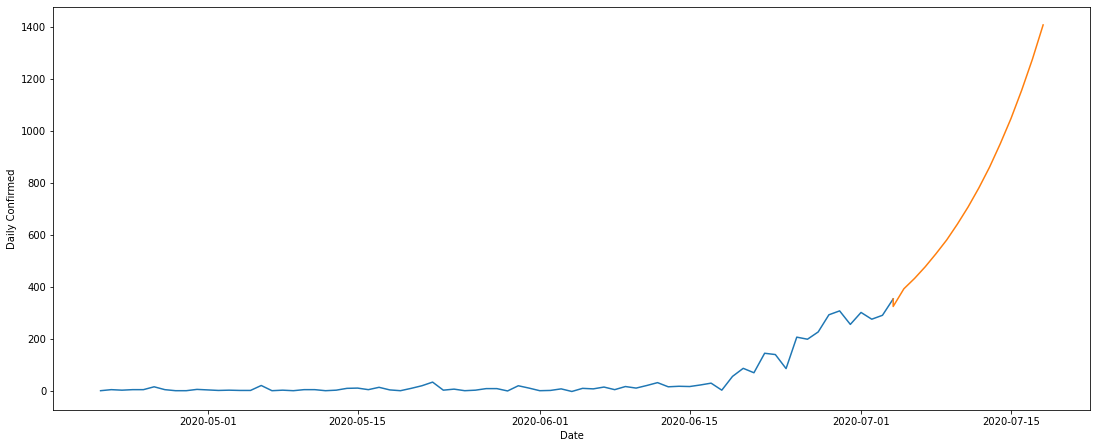

In [165]:
%matplotlib inline
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(18,7))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

time = df['Date']
position =df['Daily Confirmed']

time1 = final['Date']
position1 = final['Daily Confirmed']

axes.plot(time, position)
axes.plot(time1, position1)
plt.xlabel('Date')
plt.ylabel('Daily Confirmed')

plt.show()
fig.savefig('MDU_Daily.png')


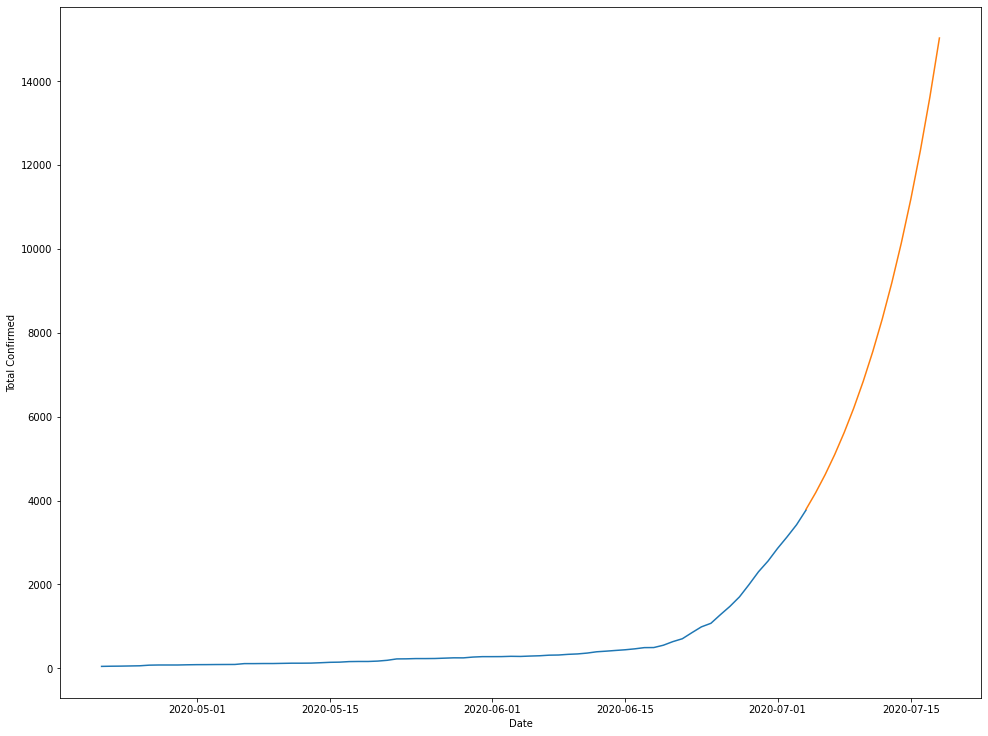

In [170]:
%matplotlib inline
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(16,12))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

time = DF['Date']
position =DF['Total Confirmed']

time1 = final['Date']
position1 = final['Total Confirmed']
axes.plot(time, position)
axes.plot(time1, position1)

plt.xlabel('Date')
plt.ylabel('Total Confirmed')
fig.savefig('MDU_Total.png')

In [169]:
#save to Csv
final = final.iloc[1:]
final.to_csv("predictMDU.csv")
pr=pd.read_csv('predictMDU.csv')
pr.head()

,Unnamed: 0,Daily Confirmed,Total Confirmed,Date,Day
0,1,324.0,3793.0,2020-07-04,75.0
1,2,392.0,4185.0,2020-07-05,76.0
2,3,432.0,4617.0,2020-07-06,77.0
3,4,477.0,5094.0,2020-07-07,78.0
4,5,527.0,5621.0,2020-07-08,79.0
